## Feature Engineering with Linear Regression (Housing Data)

In [35]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np 
from matplotlib import pyplot as plt 
#sns.set()

#### Loading the Data, Examining and Exploring

In [37]:
## Load in the Housing Data
df = pd.read_csv('Ames_Housing_Data.csv', sep='\t')

In [38]:
## Examine the columns, look at missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [40]:
df= df.drop(df.tail(1500).index)

In [41]:
df.shape

(1430, 82)

In [42]:
# removing outliers

df = df.loc[df['Gr Liv Area'] <= 4000,:]
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])
data = df.copy() # Keep a copy our original data 

Number of rows in the data: 1430
Number of columns in the data: 82


In [43]:
# A quick look at the data:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## One-hot encoding for dummy variables:


In [44]:

one_hot_encode_cols = df.dtypes[df.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

df[one_hot_encode_cols].head().T

,0,1,2,3,4
MS Zoning,RL,RH,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,Reg,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,Corner,Inside,Corner,Corner,Inside
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,NAmes,NAmes,NAmes,NAmes,Gilbert
Condition 1,Norm,Feedr,Norm,Norm,Norm


We're going to first do some basic data cleaning on this data: 

* Converting categorical variables to dummies
* Making skew variables symmetric

#### One-hot encoding the dummy variables:


In [45]:

df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,1430.0,7.155000e+02,4.129498e+02,1.0,3.582500e+02,715.5,1.072750e+03,1430.0
PID,1430.0,6.932636e+08,1.864324e+08,526301100.0,5.284296e+08,535304080.0,9.052018e+08,924152030.0
MS SubClass,1430.0,5.708392e+01,4.272792e+01,20.0,2.000000e+01,50.0,7.000000e+01,190.0
Lot Frontage,1190.0,6.889832e+01,2.280920e+01,21.0,5.900000e+01,68.0,8.000000e+01,313.0
Lot Area,1430.0,9.862646e+03,7.221533e+03,1300.0,7.424250e+03,9402.5,1.141275e+04,215245.0
...,...,...,...,...,...,...,...,...
Sale Type_WD,1430.0,8.944056e-01,3.074253e-01,0.0,1.000000e+00,1.0,1.000000e+00,1.0
Sale Condition_Alloca,1430.0,9.790210e-03,9.849439e-02,0.0,0.000000e+00,0.0,0.000000e+00,1.0
Sale Condition_Family,1430.0,1.258741e-02,1.115243e-01,0.0,0.000000e+00,0.0,0.000000e+00,1.0
Sale Condition_Normal,1430.0,8.664336e-01,3.403049e-01,0.0,1.000000e+00,1.0,1.000000e+00,1.0


### Log transforming skew variables


In [46]:
# Creating a list of float colums to check for skewing
mask = data.dtypes == float
float_cols = data.columns[mask]

skew_limit = 0.75 # defining a limit above which we will log transform
skew_vals = data[float_cols].skew()

In [47]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
BsmtFin SF 2,3.970534
Bsmt Half Bath,3.838357
Mas Vnr Area,2.347991
Lot Frontage,1.330637
Bsmt Unf SF,0.976477
BsmtFin SF 1,0.878724


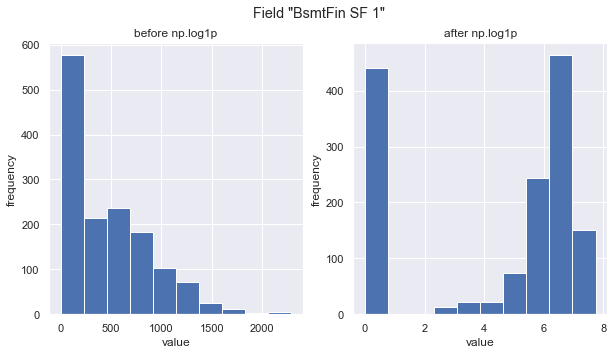

In [50]:
field = "BsmtFin SF 1"

# Creating "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Creatinga histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Applying a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [51]:
# Performing skew transformation:

for col in skew_cols.index.values:
    if col == "SalePrice":
        continue
    df[col] = df[col].apply(np.log1p)

In [52]:
# We now have a larger set of potentially-useful features
df.shape

(1430, 241)

In [53]:
# There are a *lot* of variables. Let's go back to our saved original data and look at how many values are missing for each variable. 
df = data
data.isnull().sum().sort_values()

Order              0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
                ... 
Fireplace Qu     699
Fence           1139
Alley           1321
Misc Feature    1372
Pool QC         1429
Length: 82, dtype: int64

 Let's pick out just a few numeric columns to illustrate basic feature transformations.


In [54]:
smaller_df= df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars','SalePrice']]

In [55]:
# Now we can look at summary statistics of the subset data
smaller_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Area,1430.0,9862.646154,7221.532801,1300.0,7424.25,9402.5,11412.75,215245.0
Overall Qual,1430.0,6.104196,1.414084,1.0,5.00,6.0,7.00,10.0
Overall Cond,1430.0,5.593706,1.162435,1.0,5.00,5.0,6.00,9.0
Year Built,1430.0,1970.557343,30.492262,1872.0,1953.00,1972.0,1999.75,2010.0
Year Remod/Add,1430.0,1984.442657,20.939828,1950.0,1965.00,1993.0,2004.00,2010.0
Gr Liv Area,1430.0,1490.879021,469.626487,407.0,1143.00,1452.0,1728.00,3493.0
Full Bath,1430.0,1.563636,0.547089,0.0,1.00,2.0,2.00,4.0
Bedroom AbvGr,1430.0,2.839860,0.837508,0.0,2.00,3.0,3.00,6.0
Fireplaces,1430.0,0.598601,0.648839,0.0,0.00,1.0,1.00,3.0
Garage Cars,1430.0,1.766434,0.755659,0.0,1.00,2.0,2.00,5.0


In [56]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1429
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        1430 non-null   int64  
 1   Overall Qual    1430 non-null   int64  
 2   Overall Cond    1430 non-null   int64  
 3   Year Built      1430 non-null   int64  
 4   Year Remod/Add  1430 non-null   int64  
 5   Gr Liv Area     1430 non-null   int64  
 6   Full Bath       1430 non-null   int64  
 7   Bedroom AbvGr   1430 non-null   int64  
 8   Fireplaces      1430 non-null   int64  
 9   Garage Cars     1430 non-null   float64
 10  SalePrice       1430 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 134.1 KB


In [57]:
# There appears to be one NA in Garage Cars - we will take a simple approach and fill it with 0
smaller_df = smaller_df.fillna(0)

In [58]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1429
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        1430 non-null   int64  
 1   Overall Qual    1430 non-null   int64  
 2   Overall Cond    1430 non-null   int64  
 3   Year Built      1430 non-null   int64  
 4   Year Remod/Add  1430 non-null   int64  
 5   Gr Liv Area     1430 non-null   int64  
 6   Full Bath       1430 non-null   int64  
 7   Bedroom AbvGr   1430 non-null   int64  
 8   Fireplaces      1430 non-null   int64  
 9   Garage Cars     1430 non-null   float64
 10  SalePrice       1430 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 134.1 KB



## Pair plot of features

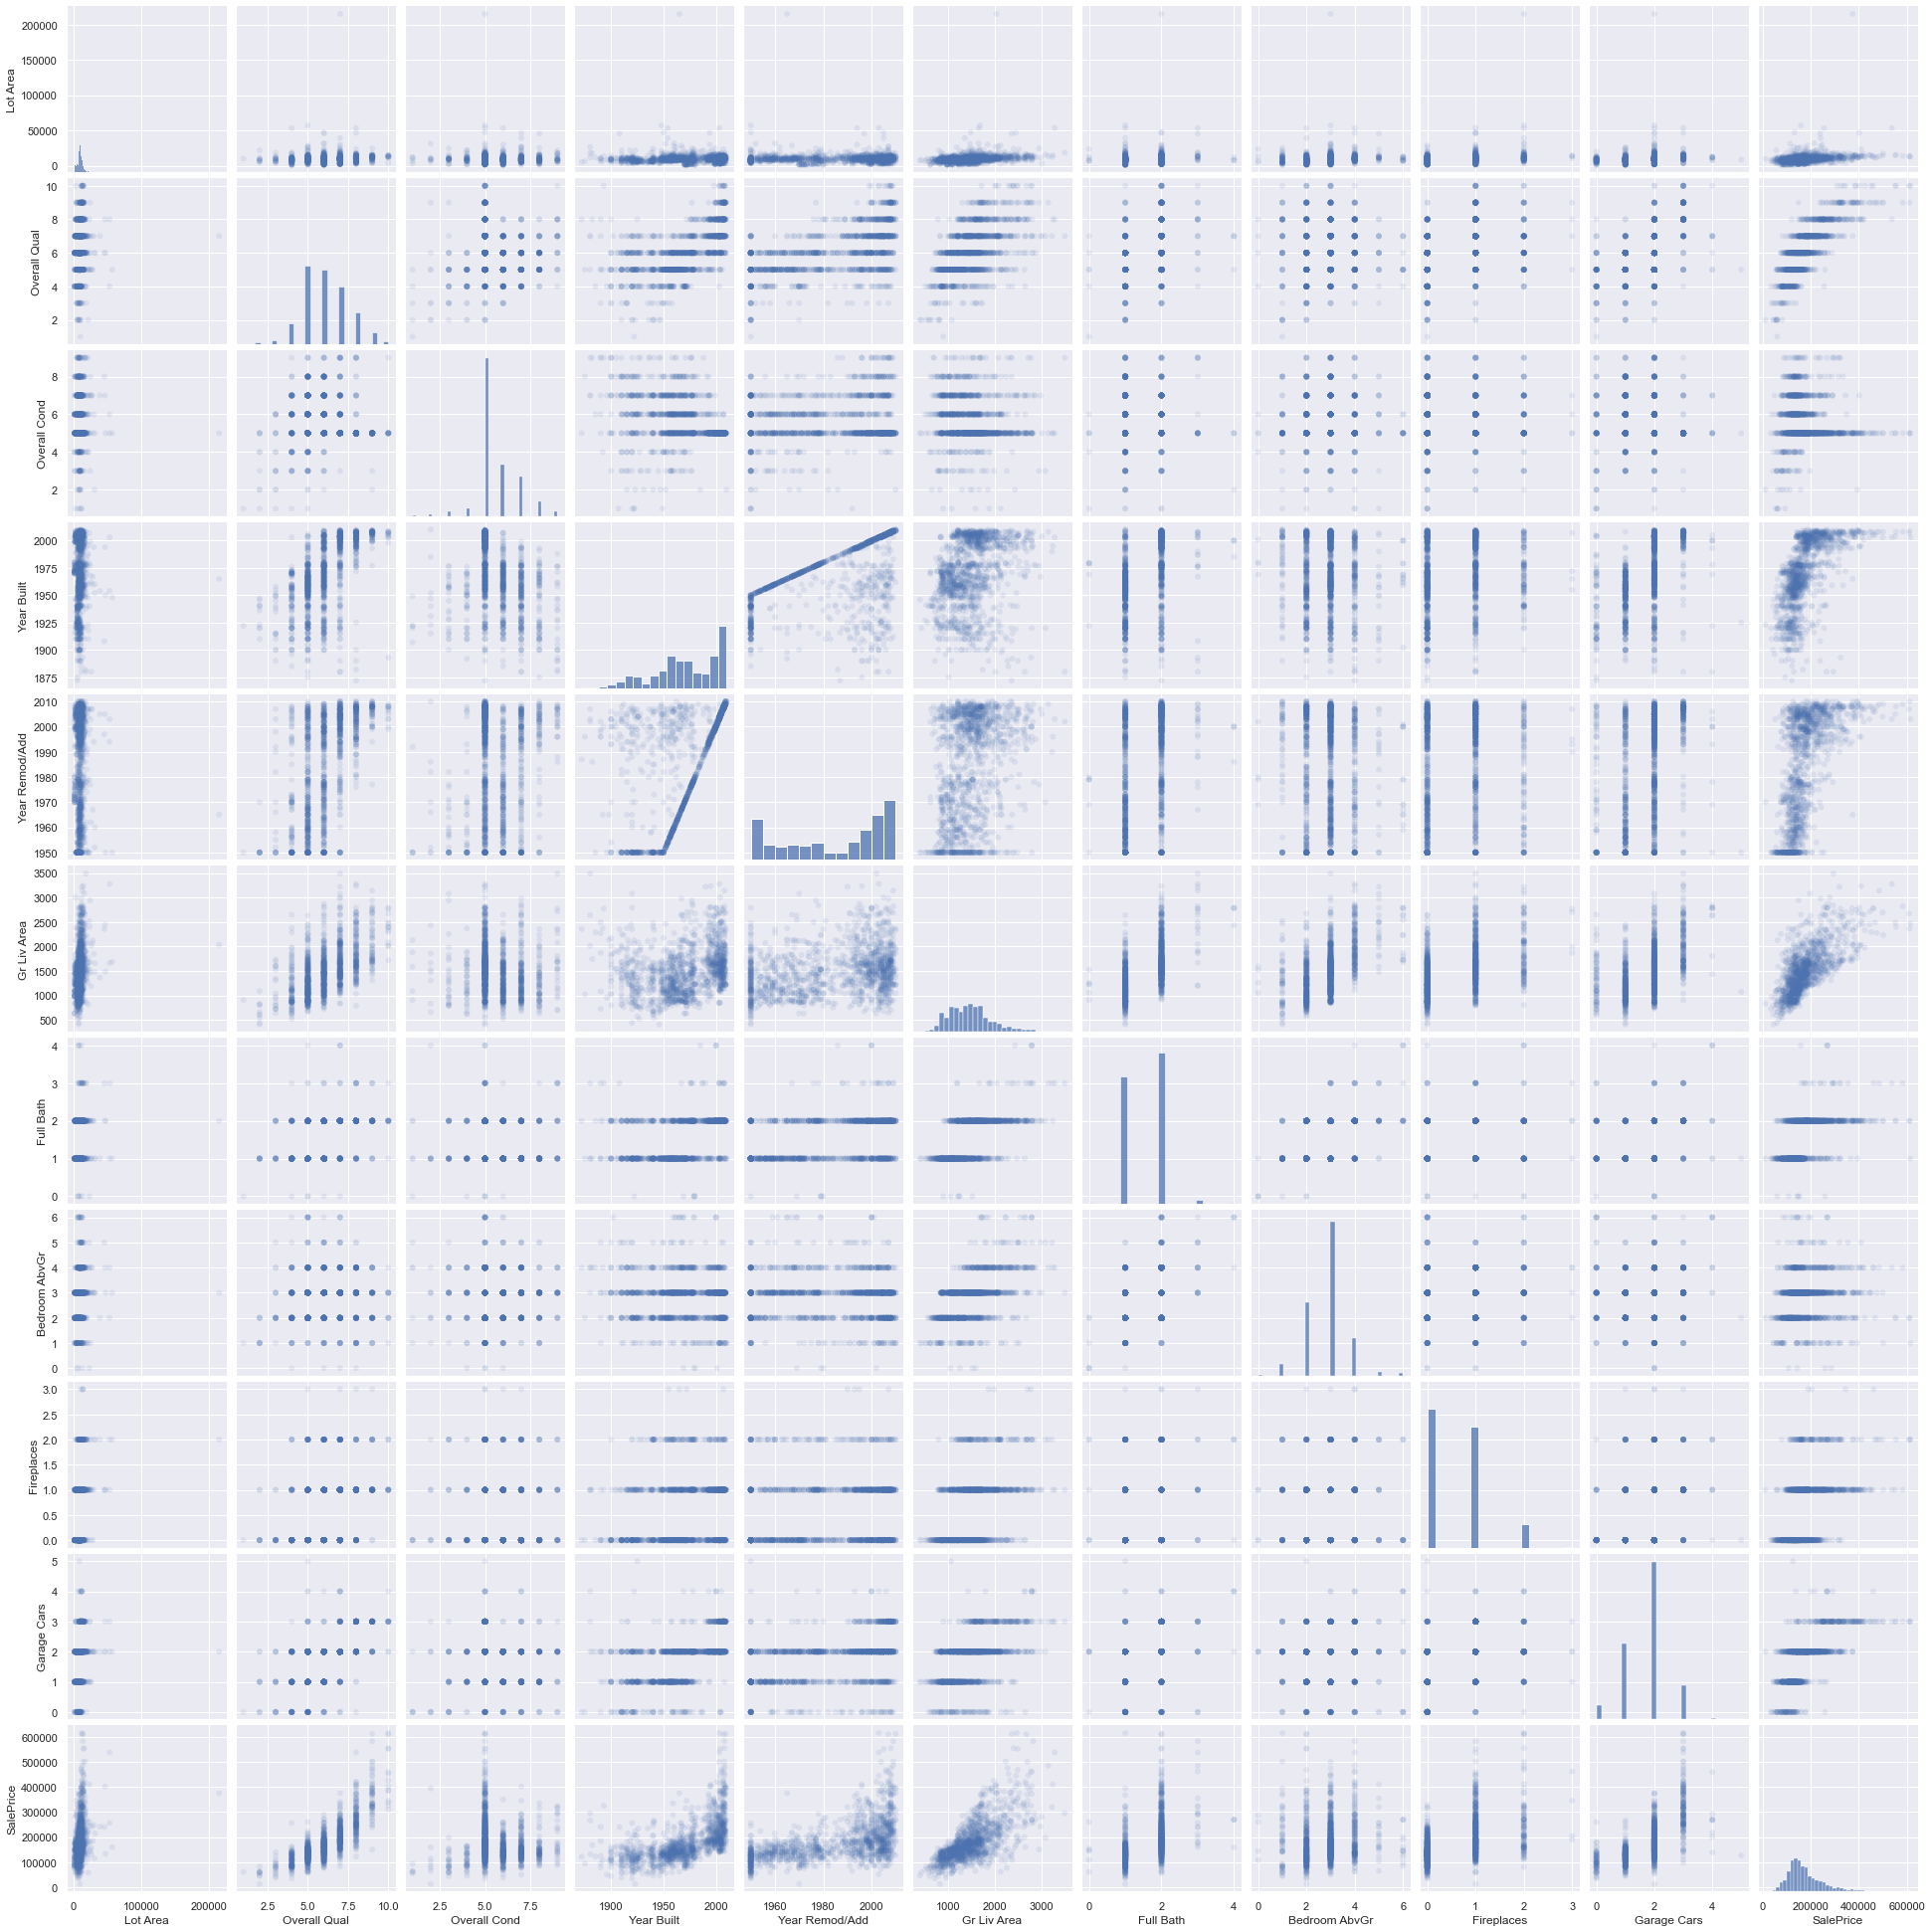

In [59]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor='none'))

#### Suppose our target variable is the SalePrice. We can set up separate variables for features and target.


In [60]:
#Separate our features from our target

X = smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars']]

y = smaller_df['SalePrice']

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1429
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        1430 non-null   int64  
 1   Overall Qual    1430 non-null   int64  
 2   Overall Cond    1430 non-null   int64  
 3   Year Built      1430 non-null   int64  
 4   Year Remod/Add  1430 non-null   int64  
 5   Gr Liv Area     1430 non-null   int64  
 6   Full Bath       1430 non-null   int64  
 7   Bedroom AbvGr   1430 non-null   int64  
 8   Fireplaces      1430 non-null   int64  
 9   Garage Cars     1430 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 155.2 KB



## Polynomial Features


In [62]:
X2 = X.copy()

X2['OQ2'] = X2['Overall Qual'] ** 2
X2['GLA2'] = X2['Gr Liv Area'] ** 2


In [63]:
X3 = X2.copy()

# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']



### Categories and features derived from category aggregates 


In [64]:
data['House Style'].value_counts()

1Story    729
2Story    426
1.5Fin    160
SLvl       58
SFoyer     35
2.5Unf     11
1.5Unf      8
2.5Fin      3
Name: House Style, dtype: int64

This looks ok, and here's a quick look at how dummy features actually appear:


In [65]:
pd.get_dummies(df['House Style'], drop_first=True).head()

,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0


In [66]:
nbh_counts = df.Neighborhood.value_counts()
nbh_counts

NAmes      239
OldTown    140
Somerst    102
NridgHt     91
CollgCr     88
SawyerW     84
Gilbert     82
Edwards     80
NWAmes      76
Sawyer      76
BrkSide     65
Mitchel     41
NoRidge     37
IDOTRR      32
Crawfor     28
ClearCr     24
StoneBr     24
Timber      22
SWISU       21
NPkVill     17
BrDale      16
Blmngtn     13
MeadowV     12
Veenker     11
Blueste      6
Greens       3
Name: Neighborhood, dtype: int64

In [67]:
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)

other_nbhs

['Blueste', 'Greens']

In [68]:
X4 = X3.copy()

X4['Neighborhood'] = df['Neighborhood'].replace(other_nbhs, 'Other')


In [70]:
def add_deviation_feature(X, feature, category):

    category_gb = X.groupby(category)[feature]
    
    # creating category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # computing stds from category mean for each feature value,
    # adding to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature  

In [71]:
X5 = X4.copy()
X5['House Style'] = df['House Style']
add_deviation_feature(X5, 'Year Built', 'House Style')
add_deviation_feature(X5, 'Overall Qual', 'Neighborhood')


## Polynomial Features in Scikit-Learn


In [72]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
pf = PolynomialFeatures(degree=2)

In [74]:
features = ['Lot Area', 'Overall Qual']
pf.fit(df[features])

PolynomialFeatures()

In [76]:
pf.get_feature_names_out() 

array(['1', 'Lot Area', 'Overall Qual', 'Lot Area^2',
       'Lot Area Overall Qual', 'Overall Qual^2'], dtype=object)

In [77]:
feat_array = pf.transform(df[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names_out(input_features=features))

,1,Lot Area,Overall Qual,Lot Area^2,Lot Area Overall Qual,Overall Qual^2
0,1.0,31770.0,6.0,1.009333e+09,190620.0,36.0
1,1.0,11622.0,5.0,1.350709e+08,58110.0,25.0
2,1.0,14267.0,6.0,2.035473e+08,85602.0,36.0
3,1.0,11160.0,7.0,1.245456e+08,78120.0,49.0
4,1.0,13830.0,5.0,1.912689e+08,69150.0,25.0
...,...,...,...,...,...,...
1425,1.0,11778.0,9.0,1.387213e+08,106002.0,81.0
1426,1.0,11778.0,9.0,1.387213e+08,106002.0,81.0
1427,1.0,11228.0,7.0,1.260680e+08,78596.0,49.0
1428,1.0,11454.0,8.0,1.311941e+08,91632.0,64.0
